<!-- @q -->
## Problem 1 

Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns:

In [64]:

import pandas as pd
taxi_df = pd.read_csv("data/2019_Yellow_Taxi_Trip_Data.csv")

fare_stats = taxi_df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']]

fare_stats.describe()


,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


<!-- @q -->
## Problem 2

Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`):

In [65]:
import pandas as pd
rides = pd.read_csv("data/2019_Yellow_Taxi_Trip_Data.csv")

max_trip = rides.loc[
    rides['trip_distance'].idxmax(),
    ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'trip_distance']
]
max_trip



fare_amount       176.0
tip_amount        18.29
tolls_amount       6.12
total_amount     201.21
trip_distance     38.11
Name: 8338, dtype: object

<!-- @q -->
## Problem 3 

Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [66]:
import pandas as pd
meteorites = pd.read_csv("data/Meteorite_Landings.csv")
clean_data = (
    meteorites
    .rename(columns={'mass (g)': 'mass'})
    .drop(columns=['reclat', 'reclong', 'GeoLocation'], errors='ignore')
    .sort_values('mass', ascending=False)
)

clean_data.head()



,name,id,nametype,recclass,mass,fall,year
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM


<!-- @q -->
## Problem 4

Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

**Hint 1**: Use `year.str.slice()` to grab a substring.

**Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

In [67]:
import pandas as pd
meteor_df = pd.read_csv("data/Meteorite_Landings.csv")

meteor_df['year_numeric'] = pd.to_numeric(meteor_df['year'].str.slice(6, 10), errors='coerce')

meteor_df['observed_before_1970'] = meteor_df['year_numeric'] < 1970

meteor_indexed_df = meteor_df.set_index('id').sort_index()

meteor_subset = meteor_indexed_df.loc[10036:10040]
meteor_subset


,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,year_numeric,observed_before_1970
id,,,,,,,,,,,
10036,Enigma,Valid,H4,94.0,Found,01/01/1967 12:00:00 AM,31.33333,-82.31667,"(31.33333, -82.31667)",1967.0,True
10037,Enon,Valid,"Iron, ungrouped",763.0,Found,01/01/1883 12:00:00 AM,39.86667,-83.95000,"(39.86667, -83.95)",1883.0,True
10038,Enshi,Valid,H5,8000.0,Fell,01/01/1974 12:00:00 AM,30.30000,109.50000,"(30.3, 109.5)",1974.0,False
10039,Ensisheim,Valid,LL6,127000.0,Fell,12/23/1491 12:00:00 AM,47.86667,7.35000,"(47.86667, 7.35)",1491.0,True


**BONUS**: There's a data entry error in the `year` column. Can you find it?

In [68]:
future_meteorite = meteor_df.loc[meteor_df['year_numeric'] > 2025, :]
future_meteorite







,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,year_numeric,observed_before_1970
30682,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,01/01/2101 12:00:00 AM,0.0,0.0,"(0.0, 0.0)",2101.0,False


There's a meteorite that was reportedly found in the future:

In [69]:

meteor_df.loc[future_meteorite.index, 'year_numeric'] = 2010

print("Corrected record(s):\n", meteor_df.loc[future_meteorite.index])



Corrected record(s):
                         name     id nametype recclass  mass (g)   fall  \
30682  Northwest Africa 7701  57150    Valid      CK6      55.0  Found   

                         year  reclat  reclong GeoLocation  year_numeric  \
30682  01/01/2101 12:00:00 AM     0.0      0.0  (0.0, 0.0)        2010.0   

       observed_before_1970  
30682                 False  


_This meteorite actually was found in 2010 (more information [here](https://www.lpi.usra.edu/meteor/metbull.php?code=57150))._

<!-- @q -->
## Problem 5

Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [70]:
import pandas as pd
rides_df = pd.read_csv("data/2019_Yellow_Taxi_Trip_Data.csv")
rides_df['dropoff_time'] = pd.to_datetime(rides_df['tpep_dropoff_datetime'])

hourly_summary = (
    rides_df
    .set_index('dropoff_time')
    .resample('H')
    .agg({
        'trip_distance': 'sum',
        'fare_amount': 'sum',
        'tolls_amount': 'sum',
        'tip_amount': 'sum'
    })
)

best_tip_hours = hourly_summary.sort_values('tip_amount', ascending=False).head(5)
best_tip_hours


/tmp/ipykernel_16832/3999254305.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('H')


,trip_distance,fare_amount,tolls_amount,tip_amount
dropoff_time,,,,
2019-10-23 16:00:00,10676.95,67797.76,699.04,12228.64
2019-10-23 17:00:00,16052.83,70131.91,4044.04,12044.03
2019-10-23 18:00:00,3104.56,11565.56,1454.67,1907.64
2019-10-23 15:00:00,14.34,213.50,0.00,51.75
2019-10-23 19:00:00,98.59,268.00,24.48,25.74


<!-- @q -->
## Problem 6

Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

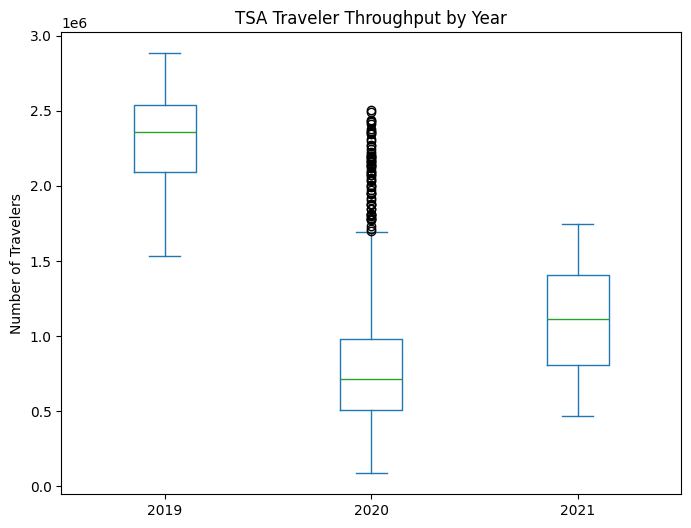

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
travel_df = pd.read_csv("data/tsa_melted_holiday_travel.csv")
travel_df.plot(
    kind='box',
    column='travelers',
    by='year',
    figsize=(8, 6)
)
plt.title("TSA Traveler Throughput by Year")
plt.suptitle("")  
plt.ylabel("Number of Travelers")
plt.show()



<!-- @q -->
## Problem 7
Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

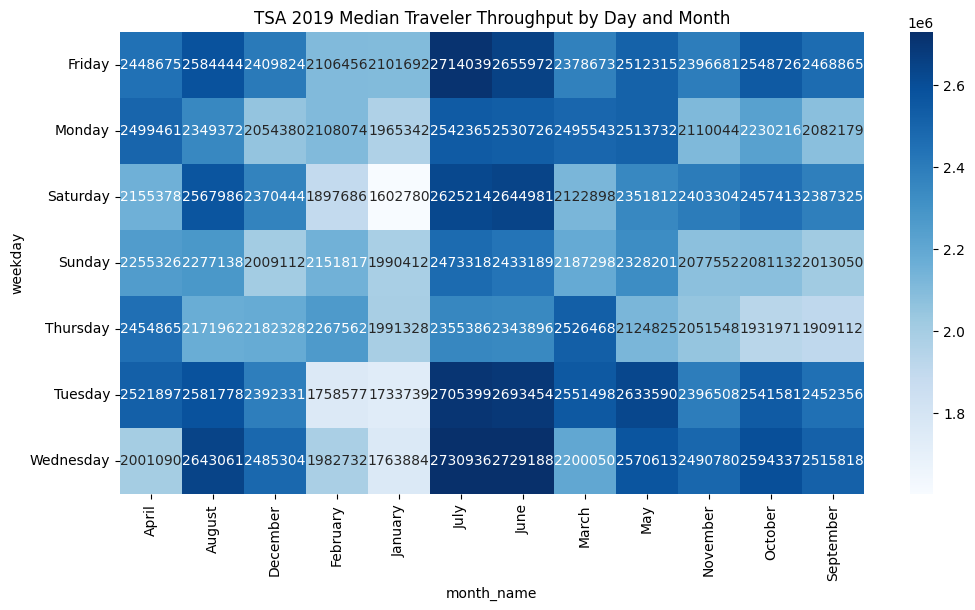

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tsa_2019_df = travel_df[travel_df['year'] == 2019].copy()

tsa_2019_df['date'] = pd.to_datetime(tsa_2019_df['date'])
tsa_2019_df['weekday'] = tsa_2019_df['date'].dt.day_name()
tsa_2019_df['month_name'] = tsa_2019_df['date'].dt.month_name()

median_travelers = (
    tsa_2019_df.groupby(['weekday', 'month_name'])['travelers']
    .median()
    .unstack()
)

plt.figure(figsize=(12, 6))
sns.heatmap(median_travelers, cmap="Blues", annot=True, fmt=".0f")
plt.title("TSA 2019 Median Traveler Throughput by Day and Month")
plt.show()

